# Selenium 개요

## 1. Selenium
- 웹페이지 테스트 자동화를 할 수 있는 프레임워크
- 셀레니움 사용하면 완전한 형태의 웹 페이지 소스를 볼 수 있기 때문에 스크래핑할 때 유용

## 2. 사용 예
- 자바스크립트가 동적으로 만든 데이터 스크래핑할 때
- 사이트의 다양한 HTML 요소에 클릭, 키보드 입력 등 이벤트를 줄 때

## 3. selenium 설치
```
pip install selenium
```

## 4. 사용 방법

### 4.1 WebDriver 사용 방법(4.11.0 버전 이전)

- 셀레니움을 사용하려면 사용중인 웹 브라우저의 드라이버 파일을 다운로드해야 함
- 크롬 드라이버 파일 다운로드 받기
```
chrome://version/ 버전 확인
https://chromedriver.chromium.org/downloads 에서 chrome 버전과 운영체제에 맞는 드라이버 다운로드
압축 푼 뒤 응용 프로그램을 현재 작업 디렉토리에 카피
```

### 4.2 WebDriver 사용 방법(4.11.0 버전 이후)
- Selenium Manager가 로컬에 설치된 브라우저의 버전을 감지하고, 해당하는 드라이버의 버전을 찾아서 자동으로 다운로드 하므로 추가 작업 필요 없음
`

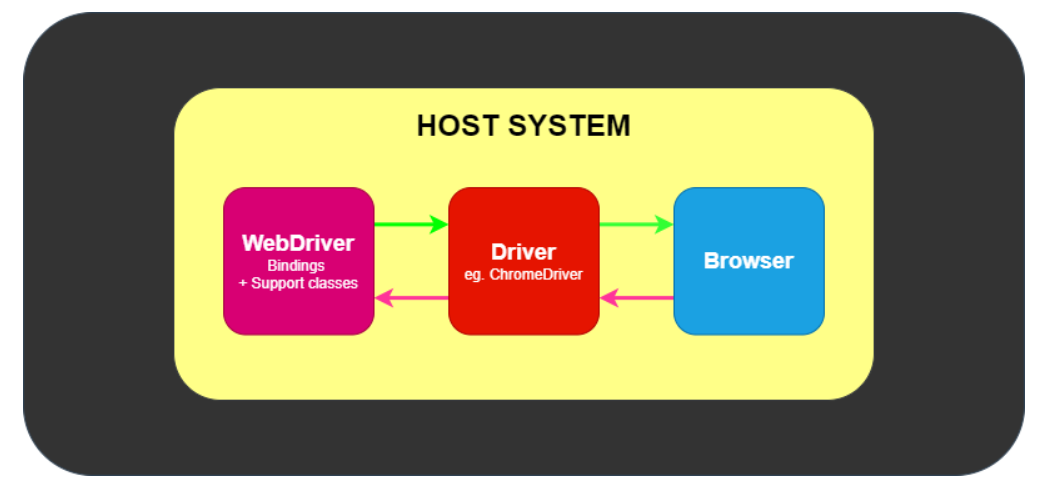

In [1]:
from IPython.display import Image
Image('webdriver.png')

# Selenium 시작하기

* 참고사이트
```
https://www.selenium.dev/documentation/webdriver/getting_started/
```    

In [2]:
import selenium
from selenium import webdriver

import requests
import time

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import pandas as pd
from io import StringIO
print(selenium.__version__)

4.32.0


## Selenium을 사용하여 Chrome 웹 브라우저를 조작

In [6]:
driver = webdriver.Chrome()

In [7]:
driver.get('https://naver.com') # 해당 url 창 켜짐, Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다.

In [8]:
driver.back()

In [9]:
driver.forward()

In [10]:
driver.refresh()

In [11]:
driver.quit()

## Selenium에서 웹 요소 찾기
- 더 자세한 내용은
```
https://www.selenium.dev/documentation/webdriver/elements/
```

**find_element(By.TAG_NAME, tag_name)**

In [12]:
driver = webdriver.Chrome()
driver.get('https://naver.com')

elem = driver.find_element(By.TAG_NAME, 'a')
elem

<selenium.webdriver.remote.webelement.WebElement (session="1bdd00b6482fc01a9ec2ad101b1bf402", element="f.EFB1D5B5902D91C998BA6FBFD89FDAB6.d.F332CB8DCC6B9D57ADEA6F9B844D8306.e.86")>

In [13]:
elem.get_attribute('href')

'https://www.naver.com/#topAsideButton'

In [22]:
driver.quit()

In [17]:
driver = webdriver.Chrome()
driver.get('https://naver.com')

elems = driver.find_elements(By.TAG_NAME, 'a')
len(elems)

176

In [48]:
for elem in elems[:10]:
    print(elem.get_attribute('href'))
    # elem.click()

MaxRetryError: HTTPConnectionPool(host='localhost', port=65498): Max retries exceeded with url: /session/c8520ce7706835532956dbd38b635c1a/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001C084F6EF00>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

**find_element(By.ID, 'element_id')**

In [30]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.ID, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem = driver.find_element(By.ID, 'search-btn')
elem.click()
time.sleep(1)

driver.quit()

**find_element(By.NAME, 'element_name')**

In [31]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.NAME, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem = driver.find_element(By.ID, 'search-btn')
elem.click()
time.sleep(1)

driver.quit()

**find_element(By.XPATH, 'xpath_expression')**

In [32]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.NAME, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem = driver.find_element(By.XPATH, '//*[@id="search-btn"]') # Copy -> Copy XPath
elem.click()
time.sleep(1)

driver.quit()

**find_element(By.CSS_SELECTOR, 'css_selector')**

In [34]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.NAME, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem.send_keys(Keys.ENTER)
time.sleep(1)

driver.quit()

**find_element(By.LINK_TEXT, 'link_text')**

In [35]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.LINK_TEXT, '지도')
elem.click()
time.sleep(1)

driver.quit()

## **실습 1**

**다음 영화순위 검색에서 스크랩핑하기**
- 썸네일 이미지 저장하기

In [36]:
url = "https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR"

# todo
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

with open('mymovie2.html', 'w', encoding='utf8') as fd:
    fd.write(driver.page_source)

- 현재 보이는 페이지에서 10개 thumbnail 이미지의 링크 (1-10위)

In [43]:
# todo
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

images = soup.select('div > div.item-thumb > c-thumb > div > a > img')
len(images)

37

In [45]:
images[0]['src']

'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F03f59362395786bdbb61b1c442625a28cd0c92da'

In [47]:
for image in images[:10]:
    print(image['src'])

https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F03f59362395786bdbb61b1c442625a28cd0c92da
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fmovie-private%2Fd430d635dfce41959f1d72b36cc3d41ac9b62735
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F8f11b97fe0fa542d409202f4ccf99e0443e8d5fc
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fbec4db6e469f8fb0a7608de3bea5b5c9dfc1d97d
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4defc7141266ab2bb9275a5796d9bb76c92d148d
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F630a0a90f481f8dc6692d63131b6fc6076c6d0e2
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fceed86e067c5be891c8fcff3e86fa6be08fb63

- 오른쪽 버튼 클릭해서 10개 thumbnail 이미지의 링크 (11-20위)

In [51]:
elem = driver.find_element(By.CSS_SELECTOR, '#mor_history_id_0 > div > div.compo-paging > button.btn_next > span')
elem.click()
time.sleep(1)

In [52]:
soup = BeautifulSoup(driver.page_source, 'lxml')

images = soup.select('div > div.item-thumb > c-thumb > div > a > img')
len(images)

37

In [53]:
for image in images[10:20]:
    image_url = image['src']
    print(image_url)

https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4c99359f6f5cea7bf2aaa18480277f01387c39cf
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Faf5d206ffc1efc38210034303100f590c881de86
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff66470e269cd2ce104a2b8ddd72050ad17189571
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fe7355eba61155fb3d2b29b92c4dace35d3a6ea7a
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Faf2ea0307faaa51128dde01e60d41989288252a2
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F56c3bc663f7415af123ae699612bc1208a521541
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fd88c52eb261240c9a6d1b0fe6eae3ab656ba228c
https://searc

- 전체 2024년도 thumbnail 이미지 가져오기

In [67]:
# todo 
url = "https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR"

driver = webdriver.Chrome()
driver.get(url)
# time.sleep(1)

image_urls = []
for i in range(3):
    # 내가 원하는 요소(div.item-thumb)가 나타날 때까지 최대 10초 기다림
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR,'div.item-thumb'))) 

    soup = BeautifulSoup(driver.page_source, 'lxml')
    images = soup.select('div > div.item-thumb > c-thumb > div > a > img')
    # len(images)
    start = i*10 # 0, 10, 20
    for image in images[start:start+10]: 
        image_urls.append(image['src']) # 10개씩 3번
    
    elem = driver.find_element(By.CSS_SELECTOR, '#mor_history_id_0 > div > div.compo-paging > button.btn_next > span')
    elem.click()
    # time.sleep(1)

driver.quit()
print(len(image_urls))

30


In [68]:
print(image_urls)

['https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F03f59362395786bdbb61b1c442625a28cd0c92da', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fmovie-private%2Fd430d635dfce41959f1d72b36cc3d41ac9b62735', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F8f11b97fe0fa542d409202f4ccf99e0443e8d5fc', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fbec4db6e469f8fb0a7608de3bea5b5c9dfc1d97d', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4defc7141266ab2bb9275a5796d9bb76c92d148d', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F630a0a90f481f8dc6692d63131b6fc6076c6d0e2', 'https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fceed86e067c5be891c

- 2024년도로부터 2015년도까지 이미지 링크

In [69]:
# todo 
driver = webdriver.Chrome()
image_urls = []
for year in range(2024, 2014, -1):
    url = "https://search.daum.net/search?w=tot&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR".format(year)
    driver.get(url)
    
    for i in range(3):
        # 내가 원하는 요소(div.item-thumb)가 나타날 때까지 최대 10초 기다림
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR,'div.item-thumb'))) 
    
        soup = BeautifulSoup(driver.page_source, 'lxml')
        images = soup.select('div > div.item-thumb > c-thumb > div > a > img')

        start = i*10 # 0, 10, 20
        for image in images[start:start+10]: 
            image_urls.append(image['src']) # 10개씩 3번
        
        elem = driver.find_element(By.CSS_SELECTOR, '#mor_history_id_0 > div > div.compo-paging > button.btn_next > span')
        elem.click()
    
driver.quit()
print(len(image_urls))

300



- **(최종)** 2024년도로부터 2015년도까지 상위 10위까지의 썸네일 이미지 파일로 저장

In [ ]:
!mkdir movie_images

In [78]:
# request를 위한 user agent 
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36'

# selenium을 위한 user agent -> 이걸로 했더니 봇 풀림
selenium_user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36'

options = webdriver.ChromeOptions()
options.add_argument(selenium_user_agent)

driver = webdriver.Chrome(options=options)

image_urls = []

for year in range(2024, 2014, -1):
    url = "https://search.daum.net/search?w=tot&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR".format(year)
    driver.get(url)
    
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR,'div.item-thumb'))) 

    soup = BeautifulSoup(driver.page_source, 'lxml')
    images = soup.select('div > div.item-thumb > c-thumb > div > a > img')
    # len(images)

    for rank, image in enumerate(images[:10], start=1): 
        image_url = image['src']
        image_urls.append(image_url)
        headers = {'User-Agent' : user_agent}
        response = requests.get(image_url, headers)
        response.raise_for_status()
        with open('./movie_images/{}_movie_rank_{}.jpg'.format(year, rank), 'wb') as fd: #w는 텍스트임 wb로 저장해야 바이너리로 저장된거임
            fd.write(response.content)
    
driver.quit()
print(len(image_urls))


100


## **실습 2**
**네이버 증권(국내 증시)**
- https://finance.naver.com/sise/sise_market_sum.naver
- 관심 시가 총액 옵션 변경해 보면 스크랩핑하기

In [88]:
selenium_user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
url = 'https://finance.naver.com/sise/sise_market_sum.naver'

options = webdriver.ChromeOptions()
options.add_argument(selenium_user_agent)

driver = webdriver.Chrome(options=options)

# todo 
driver = webdriver.Chrome(options=options)

driver.get(url)

checkboxes = driver.find_elements(By.NAME, 'fieldIds')

for checkbox in checkboxes:
    if checkbox.is_selected(): # True or False
        checkbox.click() # 모든 체크박스가 uncheck 상태로 초기화
        time.sleep(0.5)

item_to_select = ['거래량', '시가', '고가', '저가']

for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, '..') #부모 element
    label = parent.find_element(By.TAG_NAME, 'label')
    if label.text in item_to_select:
        checkbox.click()

btn_apply = driver.find_element(By.XPATH, '//*[@id="contentarea_left"]/div[2]/form/div/div/div/a[1]/img')
btn_apply.click()

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"><head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t<title>시가총액 : 네이버페이 증권</title>\n\t\t\t\n\t\t\n\t\n\n\n\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta name="apple-mobile-web-app-title" content="네이버페이 증권">\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="http://finance.naver.com/sise/sise_market_sum.naver">\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="시가총액 : 네이버페이 증권">\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳">\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png">\n\t\t    \n\t
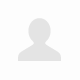
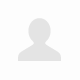

In [89]:
driver.page_source

In [91]:
data = pd.read_html(driver.page_source)

C:\Users\user\AppData\Local\Temp\ipykernel_7516\2733810518.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(driver.page_source)


In [92]:
len(data)

3

In [103]:
df = data[1]
df.head()

,N,종목명,현재가,전일비,등락률,액면가,거래량,시가,고가,저가,토론실,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,55800.0,하락 100,-0.18%,100.0,6286764.0,56200.0,56600.0,55800.0,NaN,NaN,NaN
2,2.0,SK하이닉스,200500.0,"하락 1,500",-0.74%,5000.0,1383582.0,204500.0,205000.0,199900.0,NaN,NaN,NaN
3,3.0,삼성바이오로직스,1098000.0,"상승 71,000",+6.91%,2500.0,193199.0,1033000.0,1119000.0,1032000.0,NaN,NaN,NaN
4,4.0,LG에너지솔루션,278000.0,"하락 1,500",-0.54%,500.0,155401.0,278500.0,285000.0,277500.0,NaN,NaN,NaN


In [104]:
# 테이터프레임에서 행, 열 기준 NaN인거 삭제하기
# 모든 값이 NaN인 행 삭제
# df = df.dropna(how='all', axis=0)
df.dropna(how='all', axis='index', inplace=True)

# 모든 값이 NaN인 열 삭제
# df = df.dropna(how='all', axis=1)
df.dropna(how='all', axis='columns', inplace=True)

In [105]:
df.head()

,N,종목명,현재가,전일비,등락률,액면가,거래량,시가,고가,저가
1,1.0,삼성전자,55800.0,하락 100,-0.18%,100.0,6286764.0,56200.0,56600.0,55800.0
2,2.0,SK하이닉스,200500.0,"하락 1,500",-0.74%,5000.0,1383582.0,204500.0,205000.0,199900.0
3,3.0,삼성바이오로직스,1098000.0,"상승 71,000",+6.91%,2500.0,193199.0,1033000.0,1119000.0,1032000.0
4,4.0,LG에너지솔루션,278000.0,"하락 1,500",-0.54%,500.0,155401.0,278500.0,285000.0,277500.0
5,5.0,한화에어로스페이스,849000.0,"상승 34,000",+4.17%,5000.0,190190.0,820000.0,854000.0,819000.0


## **실습 3**
**다음 뉴스**
- http://news.daum.net

In [7]:
user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
url = 'http://news.daum.net'

options = webdriver.ChromeOptions()
options.add_argument(user_agent)

driver = webdriver.Chrome(options=options)

# todo 


,category,title,link
0,0,이태원 참사 용산서장 항소심 10월 27일 선고 예정…유가족 법정으로 부른다 [세상...,https://v.daum.net/v/20250519215000279
1,0,"무산된 창원 진북면 파크골프장… 시, 예산 반환 위기\n경남신문 39분 전",https://v.daum.net/v/20250519213506119
2,0,시흥 흉기사건 용의자 중국동포 차철남 긴급체포…범행 시인\n쿠키뉴스 48분 전,https://v.daum.net/v/20250519212604013
3,0,[단독] 충남 사는 치매 노인 열흘 뒤 서울서 찾아…봄 되면 ‘실종 주의보’\n한겨...,https://v.daum.net/v/20250519210504672
4,0,정파적일수록 돈 많이 번다? 환호 받는 저널리즘의 이면\n미디어오늘 1시간 전,https://v.daum.net/v/20250519210334642
...,...,...,...
58,6,"퀄컴 ""올해 창립 40주년... AI PC·서버로 도약""\n지디넷코리아 2시간 전",https://v.daum.net/v/20250519202933970
59,6,"대체 해킹 목적이 뭘까…3년간 구멍나 있던 SKT 서버, 中조직 배후로 지목\n매일...",https://v.daum.net/v/20250519201200622
60,6,[청론직설] “원자력은 AI 경쟁력 열쇠···정권 상관 없이 에너지 정쟁 없어야”\...,https://v.daum.net/v/20250519192348477
61,6,"中 전기차 상륙...""파란 일으킬 무기는 가격·성능""\nIT동아 3시간 전",https://v.daum.net/v/20250519190304942


In [158]:
# 강사님 답
user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
url = 'http://news.daum.net'

options = webdriver.ChromeOptions()
options.add_argument(user_agent)

# driver = webdriver.Chrome(options=options)

tabs = ['사회', '경제', '정치', '국제', '문화', '생활', 'IT/과학']
data = []

with webdriver.Chrome(options=options) as driver:
    driver.get(url)
    time.sleep(1)
    
    for idx, tab in enumerate(tabs):
        elem = driver.find_element(By.LINK_TEXT, tab)
        elem.click()
        time.sleep(1)

        headline = driver.find_element(By.CSS_SELECTOR, 'ul.list_newsheadline2')
        li_s= headline.find_elements(By.TAG_NAME, 'li') # 개별 뉴스 9개
        for li in li_s:
            a = li.find_element(By.TAG_NAME, 'a')
            title = a.text
            category = idx
            link = a.get_attribute('href')
            row = [category, title, link]
            data.append(row)
data

[[0,
  "불황에 '가정의달' 소비도 달라져…외식 줄이고 중고거래·가성비 음식점 찾는 사람들\n“솔직히 외식비가 부담돼서, 올해는 도시락을 싸기로 했어요.” 부산 북구에 거주하며 자녀를 키우는 40대 주부 고 모 씨는 어린이날 외식을 고민하다 결국 도시락을 싸 들고 집 근처 공원으로 향했다. 김 씨는 “한 끼 외식비가 최소 5만~6만 원하는 게 솔직히 부담스러워 피크닉을 생각했다”며 “지출은 줄였지만 가족과 보내는 시간은 더 길어졌고, 아이들도\n부산일보 11분 전",
  'https://v.daum.net/v/20250521162425934'],
 [0,
  "순천시, 청년맞춤형 '일자리·주거·의료' 선순환 시스템 강화\n프레시안 13분 전",
  'https://v.daum.net/v/20250521162224822'],
 [0,
  '내 분신을 보냅니다···불탄 공장에 모인 ‘인형 동지’ 200명 “여기에 연대가 있다”\n경향신문 15분 전',
  'https://v.daum.net/v/20250521162020697'],
 [0,
  "인구감소에...초·중·고 '통합운영학교' 5년새 35%↑\n머니투데이 17분 전",
  'https://v.daum.net/v/20250521161857624'],
 [0,
  '[여론조사 살펴보기]⑫대선 보수 단일화 …국힘 지지층은 ‘찬성’ 개혁신당은 ‘반대’ 많아\n남도일보 18분 전',
  'https://v.daum.net/v/20250521161809595'],
 [0,
  '"대선 후보들은 시민 생명과 안전 어떻게 지킬지 답하라, 국힘은 빼고"\n오마이뉴스 18분 전',
  'https://v.daum.net/v/20250521161801576'],
 [0,
  '대통령 후보들의 동물복지 공약, 진정성 있는 약속일까\n오마이뉴스 21분 전',
  'https://v.daum.net/v/20250521161500412'],
 [0,
  '국내 최초 ‘합성생물학 특구’, 대전서 본격 가동\n프레시안 24분 전'

In [159]:
pd.DataFrame(data, columns=['category','title','link'])

,category,title,link
0,0,불황에 '가정의달' 소비도 달라져…외식 줄이고 중고거래·가성비 음식점 찾는 사람들\...,https://v.daum.net/v/20250521162425934
1,0,"순천시, 청년맞춤형 '일자리·주거·의료' 선순환 시스템 강화\n프레시안 13분 전",https://v.daum.net/v/20250521162224822
2,0,내 분신을 보냅니다···불탄 공장에 모인 ‘인형 동지’ 200명 “여기에 연대가 있...,https://v.daum.net/v/20250521162020697
3,0,인구감소에...초·중·고 '통합운영학교' 5년새 35%↑\n머니투데이 17분 전,https://v.daum.net/v/20250521161857624
4,0,[여론조사 살펴보기]⑫대선 보수 단일화 …국힘 지지층은 ‘찬성’ 개혁신당은 ‘반대’...,https://v.daum.net/v/20250521161809595
...,...,...,...
58,6,[리뷰] “과금은 낮추고 귀여움은 더하고” ‘헬로키티 프렌즈 매치’\n게임동아 12분 전,https://v.daum.net/v/20250521162402900
59,6,"""아이들을 온라인 범죄에서 지켜라""…청소년 보호 강화 나선 국내외 플랫폼\n디지털타...",https://v.daum.net/v/20250521161726556
60,6,20돌 맞은 재난문자…3G 폰 `안전 시각지대`는 어쩌나\n디지털타임스 18분 전,https://v.daum.net/v/20250521161724554
61,6,"“게임보다 깊다” XR 명상앱 ‘무아’, 감정에 몰입하다\n이데일리 20분 전",https://v.daum.net/v/20250521161524462


In [157]:
user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
url = 'http://news.daum.net'

options = webdriver.ChromeOptions()
options.add_argument(user_agent)

driver = webdriver.Chrome(options=options)

# todo
driver.get(url)
menu_items = driver.find_elements(By.CSS_SELECTOR, "#gnbContent > div > div > div > div > div > div > a")
# print(len(menu_items))
# print(menu_items[0].get_attribute('href'))

for i in range(3, 4): #10
    link = menu_items[i]
    # print(link)
    link.click()

    news = driver.find_elements(By.CSS_SELECTOR, "ul.list_newsheadline2 > li > a")
    print(len(news))
    category = i - 3
    title = news.find_elements(By.CSS_SELECTOR, "div.cont_thumb > strong.tit_txt").text
    print(title)
    # link = 


    


9


AttributeError: 'list' object has no attribute 'find_elements'

In [9]:
# 상세 기사 내용 가져오기
# todo


'[헤럴드경제=박지영 기자]이태원 참사 부실 대응으로 기소된 이임재 전 용산경찰서장의 항소심이 올해 10월 중 마무리될 예정이다. 항소심 재판부는 10월 27일을 선고기일로 예정하고 추가 증인신문 및 피해자 측 의견을 듣겠다고 했다.서울고등법원 형사13부(부장 백강진)는 19일 이태원 참사 관련해 업무상과실치사 등으로 기소된 용산서 관계자들의 항소심 첫 공판을 진행했다. 지난해 9월 1심 재판부는 이임재 전 용산경찰서장에 금고 3년을 선고했다. 송병주 전 용산서 112 상황실장은 징역 2년, 박모 전 용산서 112 상황팀장은 금고 1년에 집행유예 2년이 선고됐다.오는 6월 9일, 6월 23일, 7월 14일 공판기일을 진행한다. 추가 증인신문 및 전문가 증인을 통해 사건의 전말을 다시 한번 살펴볼 예정이다. 피해자 유가족 등을 법정으로 불러 양형에 대한 의견을 별도로 듣는다. 항소심 재판부는 “피해자 측의 양형 증인 내지 진술을 위해 별도로 기일을 할애하겠다. 재판부에게 피해자로서 진술권을 행사하실 기회를 드리겠다”고 했다. 증인 신문 절차가 종료된 이후 별도 공판기일을 잡을 것으로 보인다.항소심 재판부는 이날 공판을 보러 온 피해자 유가족에게도 진술 기회를 줬다. 이태원 참사 희생자 배우 이지한(사망 당시 24세)의 어머니 조모 씨는 “2022년 10월 29일 국가의 부작위로 아들 지한이를 잃었다. 길거리에 지진이 난 것도, 불이 난 것도 아니다”라며 “(이태원 참사는)사람이 출동하지 않아서 생긴 ‘인재’다. 사람이 출동하지 않고 경찰이 자리에서 끝까지 책임을 다하지 않아 생긴 일”이라고 호소했다.그러면서 “2심에서 형량이 줄어들까 겁이 난다. 구할 수 있었는데도 작전이라도 한 듯 (현장에) 나가지 않았다”며 “1명도 죽지 않고 모두 살릴 수 있었다. 국민을 지키지 못한 공무원들은 반드시 처벌해 참사를 예방해야 한다”고 했다.이날 재판에는 참사 당시 이태원 파출소 소속 경찰관 2명이 증인으로 출석했다. 경찰관 이모 씨는 현장에 출동해 압사 사고를 인식 2차례 

In [ ]:
article_link = df['link'][0]
with webdriver.Chrome(options=options) as driver:
    